In [1]:
library(tidyverse)
library(ggplot2)
library(ggthemes)
library(patchwork)
library(ggsci)
library(ggvenn)
library(ComplexHeatmap)
library(RColorBrewer)
library(ggbeeswarm)
library(tidyr)
library(circlize)
library(fastcluster)
library(ggrepel)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: grid

ComplexHeatmap version 2.20.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformati

In [2]:
setwd("/data/wuqinhua/scPhase/Lung")

## 1. Attribution score top20 gene

In [3]:
attrdf_1 = read.table('./ensemble_gene_attributions_normal.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
attrdf_1 <- attrdf_1[order(attrdf_1$mean_attribution, decreasing = TRUE),]
top20_1 <- attrdf_1[1:20, ] # nolint
colors <- colorRampPalette(c("#B3EE3A","#006400"))(20)#
p1 = ggplot(top20_1, mapping = aes(x = reorder(gene,mean_attribution), y = mean_attribution)) +
  geom_bar(stat = 'identity',fill=colors,width=0.78,position =position_dodge(0.7)) + # nolint
  labs(x= " ",y="Normal Attribution Score", fill = "gene",size=8,family = "sans", face = "bold.italic") +
  coord_flip()+ # nolint
  geom_text(aes(label = sprintf("%.3f",mean_attribution)),size =3,hjust = ifelse(top20_1$mean_attribution < 0,0,1))+
  scale_fill_manual(name = "Gene",values = colors) +
  theme_classic() +
  theme(axis.text = element_text(family = "sans",size = 10, face = "bold.italic"))
#ggsave('./plot/top20_H.png',p1,width =6,height=8)

attrdf_2 = read.table('./ensemble_gene_attributions_lung_adenocarcinoma.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
attrdf_2 <- attrdf_2[order(attrdf_2$mean_attribution, decreasing = TRUE),]
top20_2 <- attrdf_2[1:20, ]
colors <- colorRampPalette(c("#87CEFA","#1C86EE"))(20)#
p2 <- ggplot(top20_2, mapping = aes(x = reorder(gene,mean_attribution), y = mean_attribution)) +
  geom_bar(stat = 'identity',fill=colors,width=0.78,position =position_dodge(0.7)) +
  labs(x= " ",y="LUAD Attribution Score", fill = "gene",size=8,family = "sans", face = "bold.italic") +
  coord_flip()+
  geom_text(aes(label = sprintf("%.3f",mean_attribution)),size =3,hjust = ifelse(top20_2$mean_attribution < 0,0,1))+
  scale_fill_manual(name = "Gene",values = colors) +
  theme_classic() +
  theme(axis.text = element_text(family = "sans",size = 10, face = "bold.italic")) # nolint: line_length_linter.
#ggsave('./plot/top20_M.png',p2,width =6,height=8)

attrdf_3 = read.table('./ensemble_gene_attributions_squamous_cell_lung_carcinoma.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
attrdf_3 <- attrdf_3[order(attrdf_3$mean_attribution, decreasing = TRUE),]
top20_3 <- attrdf_3[1:20, ]
colors <- colorRampPalette(c("#FFD700","#EE7942"))(20)#
p3 <- ggplot(top20_3, mapping = aes(x = reorder(gene,mean_attribution), y = mean_attribution)) +
  geom_bar(stat = 'identity',fill=colors,width=0.78,position =position_dodge(0.7)) +
  labs(x= " ",y="LUSC Attribution Score", fill = "gene",size=8,family = "sans", face = "bold.italic") +
  coord_flip()+
  geom_text(aes(label = sprintf("%.3f",mean_attribution)),size =3,hjust = ifelse(top20_3$mean_attribution < 0,0,1))+ # nolint: commas_linter.
  scale_fill_manual(name = "Gene",values = colors) +
  theme_classic() +
  theme(axis.text = element_text(family = "sans",size = 10, face = "bold.italic")) # nolint
#ggsave('./plot/top20_S.png',p3,width =6,height=8)

p = p1+p2+p3
ggsave('./Analysis/Figure/Attr_plot/top20_all_Lung.pdf',p,width =18,height=8)

In [4]:
attrdf_1 = read.table('./ensemble_gene_attributions_normal.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
attrdf_1$consistency <- attrdf_1$mean_attribution / (attrdf_1$std_attribution + 1e-8)

attrdf_2 = read.table('./ensemble_gene_attributions_lung_adenocarcinoma.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
attrdf_2$consistency <- attrdf_2$mean_attribution / (attrdf_2$std_attribution + 1e-8)

attrdf_3 = read.table('./ensemble_gene_attributions_squamous_cell_lung_carcinoma.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
attrdf_3$consistency <- attrdf_3$mean_attribution / (attrdf_3$std_attribution + 1e-8)

top20_1 <- attrdf_1[order(attrdf_1$mean_attribution, decreasing = TRUE),][1:20, ]
top20_2 <- attrdf_2[order(attrdf_2$mean_attribution, decreasing = TRUE),][1:20, ]
top20_3 <- attrdf_3[order(attrdf_3$mean_attribution, decreasing = TRUE),][1:20, ]

bubble_1 <- ggplot(top20_1, aes(x = consistency, y = mean_attribution)) +
  geom_point(aes(size = abs(mean_attribution), color = consistency), alpha = 0.8) +
  geom_text_repel(aes(label = gene), 
                  size = 2.8, 
                  color = "black",
                  box.padding = 0.5,
                  point.padding = 0.3,
                  segment.color = "grey50",
                  segment.size = 0.3,
                  max.overlaps = Inf) +
  labs(x = "Consistency (Mean/Std)", 
       y = "Mean Attribution Score", 
       title = "Normal: Top20 Genes",
       size = "Attribution\nMagnitude",
       color = "Consistency") +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 12),
        axis.text = element_text(family = "sans", size = 9),
        axis.title = element_text(family = "sans", size = 10, face = "bold"),
        legend.position = "bottom",
        legend.box = "horizontal",
        legend.key.size = unit(0.4, "cm"),
        legend.text = element_text(size = 8),
        legend.title = element_text(size = 9)) +
  scale_color_gradient(low = "#B3EE3A", high = "#006400", name = "Consistency") +
  scale_size_continuous(range = c(4, 12), name = "Attribution\nMagnitude") +
  guides(color = guide_colorbar(title.position = "top", title.hjust = 0.5),
         size = guide_legend(title.position = "top", title.hjust = 0.5))

bubble_2 <- ggplot(top20_2, aes(x = consistency, y = mean_attribution)) +
  geom_point(aes(size = abs(mean_attribution), color = consistency), alpha = 0.8) +
  geom_text_repel(aes(label = gene), 
                  size = 2.8, 
                  color = "black",
                  box.padding = 0.5,
                  point.padding = 0.3,
                  segment.color = "grey50",
                  segment.size = 0.3,
                  max.overlaps = Inf) +
  labs(x = "Consistency (Mean/Std)", 
       y = "Mean Attribution Score", 
       title = "LUAD: Top20 Genes",
       size = "Attribution\nMagnitude",
       color = "Consistency") +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 12),
        axis.text = element_text(family = "sans", size = 9),
        axis.title = element_text(family = "sans", size = 10, face = "bold"),
        legend.position = "bottom",
        legend.box = "horizontal",
        legend.key.size = unit(0.4, "cm"),
        legend.text = element_text(size = 8),
        legend.title = element_text(size = 9)) +
  scale_color_gradient(low = "#87CEFA", high = "#1C86EE", name = "Consistency") +
  scale_size_continuous(range = c(4, 12), name = "Attribution\nMagnitude") +
  guides(color = guide_colorbar(title.position = "top", title.hjust = 0.5),
         size = guide_legend(title.position = "top", title.hjust = 0.5))

bubble_3 <- ggplot(top20_3, aes(x = consistency, y = mean_attribution)) +
  geom_point(aes(size = abs(mean_attribution), color = consistency), alpha = 0.8) +
  geom_text_repel(aes(label = gene), 
                  size = 2.8, 
                  color = "black",
                  box.padding = 0.5,
                  point.padding = 0.3,
                  segment.color = "grey50",
                  segment.size = 0.3,
                  max.overlaps = Inf) +
  labs(x = "Consistency (Mean/Std)", 
       y = "Mean Attribution Score", 
       title = "LUSC: Top20 Genes",
       size = "Attribution\nMagnitude",
       color = "Consistency") +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 12),
        axis.text = element_text(family = "sans", size = 9),
        axis.title = element_text(family = "sans", size = 10, face = "bold"),
        legend.position = "bottom",
        legend.box = "horizontal",
        legend.key.size = unit(0.4, "cm"),
        legend.text = element_text(size = 8),
        legend.title = element_text(size = 9)) +
  scale_color_gradient(low = "#FFD700", high = "#EE7942", name = "Consistency") +
  scale_size_continuous(range = c(4, 12), name = "Attribution\nMagnitude") +
  guides(color = guide_colorbar(title.position = "top", title.hjust = 0.5),
         size = guide_legend(title.position = "top", title.hjust = 0.5))

bubble_combined <- bubble_1 + bubble_2 + bubble_3

ggsave('./Analysis/Figure/Attr_plot//bubble_plot_Lung.pdf', 
       bubble_combined, 
       width = 15, 
       height = 8,
       device = "pdf")

## 2. venn plot of H-M-S

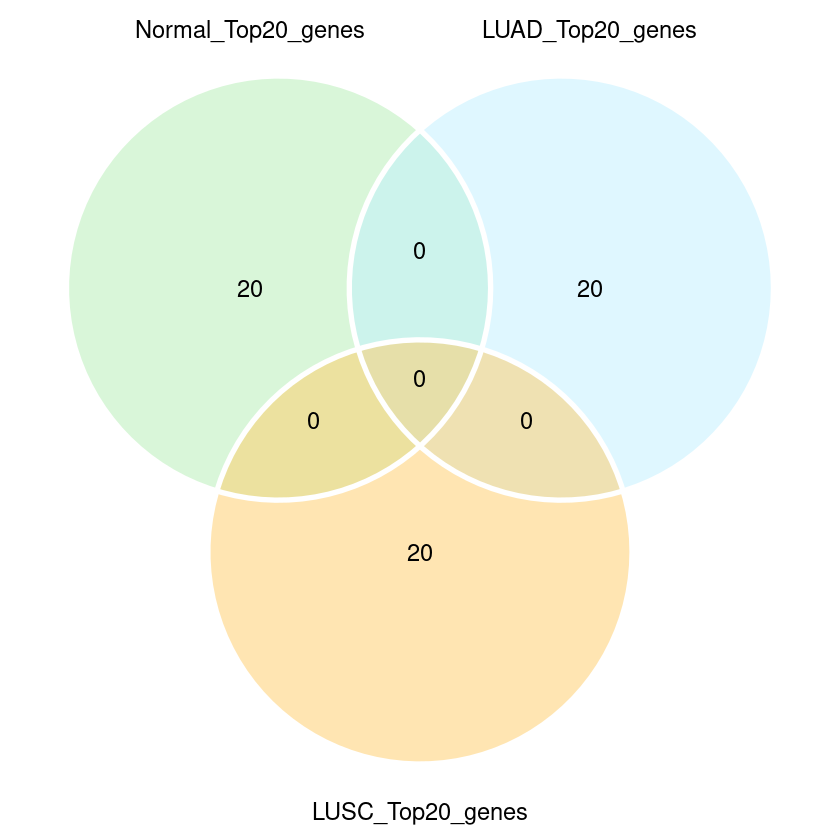

In [5]:
covid_1 = read.table('./ensemble_gene_attributions_normal.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
covid_1 <- covid_1[order(covid_1$mean_attribution, decreasing = TRUE),]
genes_1 <- covid_1[1:20, 1] # nolint
covid_2 = read.table('./ensemble_gene_attributions_lung_adenocarcinoma.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
covid_2 <- covid_2[order(covid_2$mean_attribution, decreasing = TRUE),]
genes_2 <- covid_2[1:20, 1]
covid_3 = read.table('./ensemble_gene_attributions_squamous_cell_lung_carcinoma.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
covid_3 <- covid_3[order(covid_3$mean_attribution, decreasing = TRUE),]
genes_3 <- covid_3[1:20, 1]
dat = list(Normal_Top20_genes=genes_1, LUAD_Top20_genes=genes_2, LUSC_Top20_genes=genes_3)
p1 <- ggvenn(dat,show_percentage = F,stroke_color = "white",stroke_size = 1.5,
             fill_color = c("#B4EEB4", "#BFEFFF", "#FFCC66"),
             set_name_size = 5,text_size=5)
p1
ggsave("./Analysis/Figure/Attr_plot/ggvenn_top20.pdf", p1, width=5, height=5)

unique_1_genes <- setdiff(genes_1, c(genes_2, genes_3))
unique_2_genes <- setdiff(genes_2, c(genes_1, genes_3))
unique_3_genes <- setdiff(genes_3, c(genes_1, genes_2))

max_length <- max(length(unique_1_genes), length(unique_2_genes), length(unique_3_genes))
unique_1_genes <- c(unique_1_genes, rep(NA, max_length - length(unique_1_genes)))
unique_2_genes <- c(unique_2_genes, rep(NA, max_length - length(unique_2_genes)))
unique_3_genes <- c(unique_3_genes, rep(NA, max_length - length(unique_3_genes)))

gene_unique <- data.frame(H=unique_1_genes, M=unique_2_genes, S=unique_3_genes)
write.csv(gene_unique, file = "./Analysis/Figure/Attr_plot/unique_Topgenes_venn.csv", row.names = FALSE)


## 3. Heatmap of top20 gene attribution score

In [7]:
attrdf_1 = read.table('./ensemble_gene_attributions_normal.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
attrdf_1 <- attrdf_1[order(attrdf_1$mean_attribution, decreasing = TRUE),]
top20_1 <- attrdf_1[1:20, ] # nolint
attrdf_2 = read.table('./ensemble_gene_attributions_lung_adenocarcinoma.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
attrdf_2 <- attrdf_2[order(attrdf_2$mean_attribution, decreasing = TRUE),]
top20_2 <- attrdf_2[1:20, ]
attrdf_3 = read.table('./ensemble_gene_attributions_squamous_cell_lung_carcinoma.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
attrdf_3 <- attrdf_3[order(attrdf_3$mean_attribution, decreasing = TRUE),]
top20_3 <- attrdf_3[1:20, ]
combined_genes <- union(union(top20_1$gene, top20_2$gene), top20_3$gene)
unique_genes <- unique(combined_genes)

data = read.csv('./sample_gene_attribution_mean.csv',row.names = 1)
selected_columns <- names(data) %in% unique_genes
all_top20 = data[, selected_columns, drop = FALSE]
all_top20 = as.matrix(all_top20)
all_top20 <- apply(all_top20, 2, function(x) (x - min(x)) / (max(x) - min(x)))


condition = read.csv('./sample_info.csv')
rownames(condition) <- gsub("\\.", "_", rownames(condition))
dict1 <- setNames(condition$disease, condition$sample)

group = c()
for (i in seq_along(row.names(all_top20))){
  row_name <- row.names(all_top20)[i]
  g <- dict1[row_name]
  group[i] <- g
}
df <- data.frame(group)
expData = t(scale(t(all_top20)))
expData = pmax(pmin(expData,2),-2)

col_fun = colorRamp2(c(-2,-1,0,1,2),rev(brewer.pal(n = 5, name = "RdBu")))

left_ha = rowAnnotation(Cluster = df$group, simple_anno_size = unit(8,'points'),
                        col = list(Cluster = c("normal" = '#66DD00',"lung adenocarcinoma"="#77DDFF","squamous cell lung carcinoma"="#FFBB66")),
                        show_annotation_name = F)

fh = function(x) fastcluster::hclust(dist(x),"ave")

pdf('./Analysis/Figure/Attr_plot/heatmap_attr_ave.pdf',width = 7,height = 8)
Heatmap(expData,
        show_row_names = F,show_column_names = F,
        show_row_dend = T,show_column_dend = T,
        cluster_rows = fh,cluster_columns = fh,
        col = col_fun,
        row_title = NULL,column_title = NULL,
        heatmap_legend_param = list(title = ''),
        top_annotation = NULL,
        left_annotation = left_ha,
        right_annotation = NULL,
        use_raster = TRUE, raster_quality = 2)
dev.off()

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2

## 4. Heatmap of top20 gene expression level

In [ ]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.sparse
os.chdir("/data/wuqinhua/scPhase/Lung")


In [ ]:
sce = sc.read_h5ad("./ensemble_adata_with_attention.h5ad")
raw_matrix = sce.raw.X.tocsr() if not scipy.sparse.isspmatrix_csr(sce.raw.X) else sce.raw.X
raw_df = pd.DataFrame.sparse.from_spmatrix(
        raw_matrix,
        index=sce.obs_names,      
        columns=sce.raw.var_names  
)

In [ ]:
raw_df['sample_id'] = sce.obs['sample_id'].values
sample_gene_expression = raw_df.groupby('sample_id').sum()
hvg_genes = sce.var[sce.var['highly_variable']].index.tolist()
hvg_df = sample_gene_expression[hvg_genes]
hvg_df.to_csv("./exp_sample_Lung.csv")


In [8]:
library(tidyverse)
library(ggplot2)
library(ggthemes)
library(patchwork)
library(ggsci)
library(ggvenn)
library(ComplexHeatmap)
library(RColorBrewer)
library(ggbeeswarm)
library(tidyr)
library(circlize)
library(fastcluster)

setwd("/data/wuqinhua/scPhase/Lung")

In [9]:
attrdf_1 = read.table('./ensemble_gene_attributions_normal.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
attrdf_1 <- attrdf_1[order(attrdf_1$mean_attribution, decreasing = TRUE),]
top20_1 <- attrdf_1[1:20, ] # nolint
attrdf_2 = read.table('./ensemble_gene_attributions_lung_adenocarcinoma.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
attrdf_2 <- attrdf_2[order(attrdf_2$mean_attribution, decreasing = TRUE),]
top20_2 <- attrdf_2[1:20, ]
attrdf_3 = read.table('./ensemble_gene_attributions_squamous_cell_lung_carcinoma.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
attrdf_3 <- attrdf_3[order(attrdf_3$mean_attribution, decreasing = TRUE),]
top20_3 <- attrdf_3[1:20, ]

In [ ]:
combined_genes <- union(union(top20_1$gene, top20_2$gene), top20_3$gene)
unique_genes <- unique(combined_genes)
data = read.csv('./exp_sample_Lung.csv',row.names = 1)
selected_columns <- names(data) %in% unique_genes
all_top20 = data[, selected_columns, drop = FALSE]
all_top20 = as.matrix(all_top20)
all_top20 <- apply(all_top20, 2, function(x) (x - min(x)) / (max(x) - min(x)))


condition = read.csv('./sample_info.csv')
rownames(condition) <- gsub("\\.", "_", rownames(condition))
dict1 <- setNames(condition$disease, condition$sample)

group = c()
for (i in seq_along(row.names(all_top20))){
  row_name <- row.names(all_top20)[i]
  g <- dict1[row_name]
  group[i] <- g
}
df <- data.frame(group)
expData = t(scale(t(all_top20)))
expData = pmax(pmin(expData,2),-2)

col_fun = colorRamp2(c(-2,-1,0,1,2),rev(brewer.pal(n = 5, name = "RdBu")))

left_ha = rowAnnotation(Cluster = df$group, simple_anno_size = unit(8,'points'),
                        col = list(Cluster = c("normal" = '#66DD00',"lung adenocarcinoma"="#77DDFF","squamous cell lung carcinoma"="#FFBB66")),
                        show_annotation_name = F)

fh = function(x) fastcluster::hclust(dist(x),"ave")

pdf('./Analysis/Figure/Attr_plot/heatmap_exp_ave.pdf',width = 7,height = 8)
Heatmap(expData,
        show_row_names = F,show_column_names = F,
        show_row_dend = T,show_column_dend = T,
        cluster_rows = fh,cluster_columns = fh,
        col = col_fun,
        row_title = NULL,column_title = NULL,
        heatmap_legend_param = list(title = ''),
        top_annotation = NULL,
        left_annotation = left_ha,
        right_annotation = NULL,
        use_raster = TRUE, raster_quality = 2)
dev.off()


'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2